In [46]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


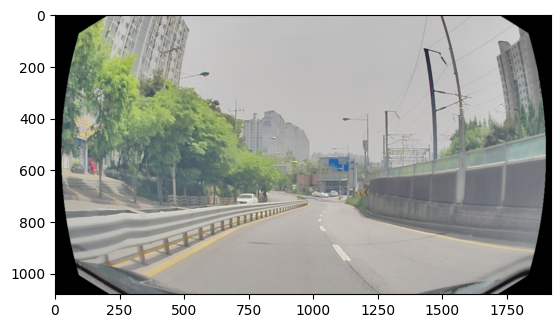

In [77]:
import os
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.backends.cudnn as cudnn

from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt

import numpy as np
from math import sqrt

class fisheye(object):
    def __init__(self, dist_coeffs=[0, 1, 0, 0]):
        self.dist_coeffs = dist_coeffs

    def __call__(self, image):
        return self.fisheye_distortion(image, self.dist_coeffs)

    def fisheye_distortion(self, image, dist_coeffs):
        # 이미지 크기 가져오기
        height, width = image.shape[:2]

        # 카메라 매트릭스 생성
        focal_length = width / 4
        center_x = width / 2
        center_y = height / 2
        camera_matrix = np.array([[focal_length, 0, center_x],
                                  [0, focal_length, center_y],
                                  [0, 0, 1]], dtype=np.float32)

        # 왜곡 계수 생성
        dist_coeffs = np.array(dist_coeffs, dtype=np.float32)

        # 왜곡 보정
        undistorted_image = cv2.undistort(image, camera_matrix, dist_coeffs)

        return undistorted_image

def main():
    image = Image.open("/content/drive/MyDrive/컴퓨터 비전/data/train_source_image/TRAIN_SOURCE_0000.png")
    image = np.array(image)
    image = fisheye([-0, 1, 0, 0])(image)
    image = A.CenterCrop(550, 1050)(image=image)
    image = A.Resize(1080, 1920)(image=image['image'])
    plt.imshow(image['image'])
    plt.show()

if __name__ == "__main__":
    main()

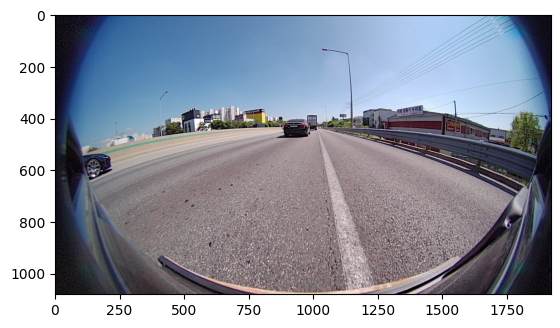

In [56]:
image = Image.open("/content/drive/MyDrive/컴퓨터 비전/data/train_target_image/TRAIN_TARGET_0000.png")
image = np.array(image)
plt.imshow(image)
plt.show()

In [57]:
image.shape

(1080, 1920, 3)